## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0, 0.25, 0.5, 0.75, 0.95]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for mom in MOMENTUM:
    for nes in (True, False):
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"Experiment with MOMENTUM = {mom}-{nes}")
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nes, momentum=mom)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = f"{mom}-{nes}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

W0725 16:10:07.658920 4310558144 deprecation_wrapper.py:119] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0725 16:10:07.740772 4310558144 deprecation.py:323] From /Users/samir/anaconda3/envs/tensorflow/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Experiment with MOMENTUM = 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.0788 - acc: 0.2553 - val_loss: 1.9622 - val_acc: 0.2905
Epoch 2/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.8902 - acc: 0.3329 - val_loss: 1.8626 - val_acc: 0.3437
Epoch 3/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.8177 - acc: 0.3595 - val_loss: 1.8420 - val_acc: 0.3438
Epoch 4/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7739 - acc: 0.3749 - val_loss: 1.7855 - val_acc: 0.3667
Epoch 5/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.7340 - acc: 0.3896 - val_loss: 1.7867 - val_acc: 0.3725
Epoch 6/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.7074 - acc: 0.3994 - val_loss: 1.8044 - val_acc: 0.3664
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6791 - acc: 0.4093 - val_loss: 1.7042 - 

Epoch 2/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.8552 - acc: 0.3437 - val_loss: 1.9224 - val_acc: 0.2830
Epoch 3/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7890 - acc: 0.3680 - val_loss: 1.7445 - val_acc: 0.3863
Epoch 4/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.7373 - acc: 0.3866 - val_loss: 1.7526 - val_acc: 0.3718
Epoch 5/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.7010 - acc: 0.4001 - val_loss: 1.7228 - val_acc: 0.3847
Epoch 6/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.6692 - acc: 0.4109 - val_loss: 1.6979 - val_acc: 0.4103
Epoch 7/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.6424 - acc: 0.4213 - val_loss: 1.6422 - val_acc: 0.4239
Epoch 8/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.6134 - acc: 0.4310 - val_loss: 1.6483 - val_acc: 0.4218
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 142us/step - loss: 1.7731 - acc: 0.3746 - val_loss: 1.7964 - val_acc: 0.3566
Epoch 4/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.7241 - acc: 0.3920 - val_loss: 1.7706 - val_acc: 0.3693
Epoch 5/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.6880 - acc: 0.4055 - val_loss: 1.6910 - val_acc: 0.3957
Epoch 6/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6534 - acc: 0.4176 - val_loss: 1.7339 - val_acc: 0.3940
Epoch 7/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.6271 - acc: 0.4274 - val_loss: 1.6435 - val_acc: 0.4273
Epoch 8/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.6010 - acc: 0.4366 - val_loss: 1.7096 - val_acc: 0.3932
Epoch 9/50
50000/50000 [==============================] - 6s 128us/step - loss: 1.5791 - acc: 0.4431 - val_loss: 1.5820 - val_acc: 0.4419
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 136us/step - loss: 1.6962 - acc: 0.4019 - val_loss: 1.7671 - val_acc: 0.3615
Epoch 5/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.6580 - acc: 0.4155 - val_loss: 1.7440 - val_acc: 0.3736
Epoch 6/50
50000/50000 [==============================] - 6s 114us/step - loss: 1.6258 - acc: 0.4279 - val_loss: 1.6639 - val_acc: 0.4156
Epoch 7/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.5904 - acc: 0.4383 - val_loss: 1.5852 - val_acc: 0.4321
Epoch 8/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5710 - acc: 0.4457 - val_loss: 1.5803 - val_acc: 0.4249
Epoch 9/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5423 - acc: 0.4536 - val_loss: 1.6571 - val_acc: 0.4213
Epoch 10/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5216 - acc: 0.4638 - val_loss: 1.5889 - val_acc: 0.4296
Epoch 11/50
50000/50000 [===================

50000/50000 [==============================] - 6s 110us/step - loss: 1.6383 - acc: 0.4226 - val_loss: 1.7026 - val_acc: 0.4006
Epoch 6/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6035 - acc: 0.4356 - val_loss: 1.6114 - val_acc: 0.4250
Epoch 7/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5721 - acc: 0.4468 - val_loss: 1.6523 - val_acc: 0.4184
Epoch 8/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.5436 - acc: 0.4590 - val_loss: 1.5554 - val_acc: 0.4450
Epoch 9/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.5208 - acc: 0.4660 - val_loss: 1.6145 - val_acc: 0.4273
Epoch 10/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.4956 - acc: 0.4744 - val_loss: 1.5399 - val_acc: 0.4539
Epoch 11/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4760 - acc: 0.4822 - val_loss: 1.4811 - val_acc: 0.4795
Epoch 12/50
50000/50000 [======================

50000/50000 [==============================] - 5s 101us/step - loss: 1.5106 - acc: 0.4640 - val_loss: 1.6139 - val_acc: 0.4196
Epoch 7/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.4784 - acc: 0.4771 - val_loss: 1.6185 - val_acc: 0.4262
Epoch 8/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4509 - acc: 0.4886 - val_loss: 1.5504 - val_acc: 0.4443
Epoch 9/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.4231 - acc: 0.4979 - val_loss: 1.4556 - val_acc: 0.4869
Epoch 10/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3980 - acc: 0.5073 - val_loss: 1.5160 - val_acc: 0.4549
Epoch 11/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.3757 - acc: 0.5137 - val_loss: 1.4990 - val_acc: 0.4598
Epoch 12/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.3552 - acc: 0.5208 - val_loss: 1.7363 - val_acc: 0.3961
Epoch 13/50
50000/50000 [=================

50000/50000 [==============================] - 5s 106us/step - loss: 1.4765 - acc: 0.4786 - val_loss: 1.5422 - val_acc: 0.4486
Epoch 8/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.4418 - acc: 0.4905 - val_loss: 1.4635 - val_acc: 0.4832
Epoch 9/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.4204 - acc: 0.4985 - val_loss: 1.4734 - val_acc: 0.4756
Epoch 10/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.3842 - acc: 0.5125 - val_loss: 1.4885 - val_acc: 0.4632
Epoch 11/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.3738 - acc: 0.5152 - val_loss: 1.4418 - val_acc: 0.4890
Epoch 12/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3450 - acc: 0.5252 - val_loss: 1.4485 - val_acc: 0.4866
Epoch 13/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.3246 - acc: 0.5344 - val_loss: 1.4190 - val_acc: 0.4904
Epoch 14/50
50000/50000 [================

50000/50000 [==============================] - 5s 104us/step - loss: 1.2896 - acc: 0.5447 - val_loss: 1.4586 - val_acc: 0.4908
Epoch 9/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.2555 - acc: 0.5547 - val_loss: 1.4279 - val_acc: 0.4950
Epoch 10/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.2260 - acc: 0.5666 - val_loss: 1.3976 - val_acc: 0.5130
Epoch 11/50
50000/50000 [==============================] - 6s 116us/step - loss: 1.2006 - acc: 0.5741 - val_loss: 1.4054 - val_acc: 0.5031
Epoch 12/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1750 - acc: 0.5824 - val_loss: 1.3518 - val_acc: 0.5253
Epoch 13/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.1442 - acc: 0.5945 - val_loss: 1.3802 - val_acc: 0.5158
Epoch 14/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.1172 - acc: 0.6032 - val_loss: 1.4263 - val_acc: 0.5059
Epoch 15/50
50000/50000 [===============

50000/50000 [==============================] - 6s 114us/step - loss: 1.3746 - acc: 0.5102 - val_loss: 1.4096 - val_acc: 0.5030
Epoch 10/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.3351 - acc: 0.5244 - val_loss: 1.4203 - val_acc: 0.4940
Epoch 11/50
50000/50000 [==============================] - 5s 98us/step - loss: 1.3197 - acc: 0.5299 - val_loss: 1.4228 - val_acc: 0.4974
Epoch 12/50
50000/50000 [==============================] - 5s 110us/step - loss: 1.2910 - acc: 0.5392 - val_loss: 1.3830 - val_acc: 0.5133
Epoch 13/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.2632 - acc: 0.5512 - val_loss: 1.3882 - val_acc: 0.5099
Epoch 14/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.2411 - acc: 0.5570 - val_loss: 1.4139 - val_acc: 0.4957
Epoch 15/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.2308 - acc: 0.5622 - val_loss: 1.3617 - val_acc: 0.5233
Epoch 16/50
50000/50000 [===============

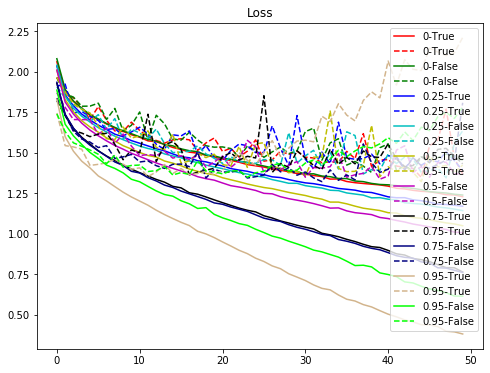

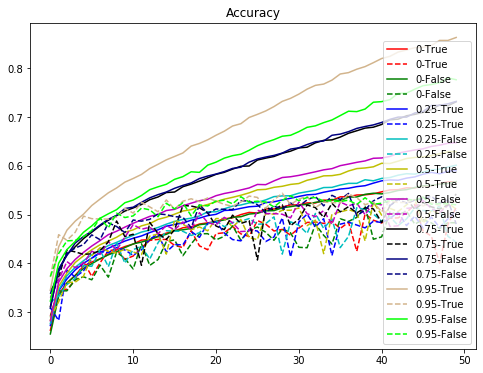

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "c", "y", "m", "k", "navy", "tan", "lime"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()